In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt

from src.elasticity.elasticity import *
from src.optimization.optimization import *
from src.config.config import *


In [2]:
optimized_df = pd.read_csv(
    "../data/external/optimized_data.csv"
)

optimized_df.head()

,product_id,category,base_price,optimized_price,base_units,optimized_units,base_revenue,optimized_revenue,revenue_change_pct
0,cpvc_pipe__1_5_inch,Pipe,366,376,940,933.187578,346481,3.508582e+05,0.019818
1,cpvc_pipe__1_inch,Pipe,256,266,940,937.830654,240745,2.494513e+05,0.036616
2,cpvc_pipe__2_inch,Pipe,518,528,968,968.234927,501017,5.110805e+05,0.019258
3,drip_irrigation_kit__0_5_acre,Irrigation,1207,1217,989,987.195133,1196261,1.201409e+06,0.006438
4,drip_irrigation_kit__1_acre,Irrigation,2023,2033,939,937.390063,1903357,1.905685e+06,0.003205


In [3]:
summary = {
    "base_revenue": optimized_df["base_revenue"].sum(),
    "optimized_revenue": optimized_df["optimized_revenue"].sum(),
    "revenue_uplift_pct": (
        optimized_df["optimized_revenue"].sum()
        / optimized_df["base_revenue"].sum()
        - 1
    )
}


In [4]:
summary

{'base_revenue': np.int64(160466922),
 'optimized_revenue': np.float64(161575310.10108945),
 'revenue_uplift_pct': np.float64(0.006907268409432454)}

In [5]:
assert (optimized_df["optimized_price"] >= optimized_df["base_price"]).all()
assert (optimized_df["optimized_units"] >= 0.95 * optimized_df["base_units"]).all()


In [6]:
(
    optimized_df
    .groupby("category")[["base_revenue", "optimized_revenue"]]
    .sum()
    .assign(
        uplift_pct=lambda x:
        x["optimized_revenue"] / x["base_revenue"] - 1
    )
)


,base_revenue,optimized_revenue,uplift_pct
category,,,
Fitting,683121,7.087723e+05,0.037550
Irrigation,10855554,1.092083e+07,0.006013
Motor,143608270,1.445372e+08,0.006469
Pipe,5319977,5.408474e+06,0.016635


In [7]:
optimized_df["price_change"] = (
    optimized_df["optimized_price"] - optimized_df["base_price"]
)

optimized_df["price_change_pct"] = (
    optimized_df["price_change"] / optimized_df["base_price"]
)

optimized_df["unit_change_pct"] = (
    optimized_df["optimized_units"] / optimized_df["base_units"] - 1
)


In [8]:
optimized_df["risk_flag"] = (
    optimized_df["price_change_pct"].abs() > 0.08
)


In [9]:
final_output = optimized_df[
    [
        "product_id",
        "category",
        "base_price",
        "optimized_price",
        "price_change",
        "price_change_pct",
        "base_units",
        "optimized_units",
        "unit_change_pct",
        "base_revenue",
        "optimized_revenue",
        "revenue_change_pct"
    ]
]


In [10]:
final_output

,product_id,category,base_price,optimized_price,price_change,price_change_pct,base_units,optimized_units,unit_change_pct,base_revenue,optimized_revenue,revenue_change_pct
0,cpvc_pipe__1_5_inch,Pipe,366,376,10,0.027322,940,933.187578,-0.007247,346481,3.508582e+05,0.019818
1,cpvc_pipe__1_inch,Pipe,256,266,10,0.039062,940,937.830654,-0.002308,240745,2.494513e+05,0.036616
2,cpvc_pipe__2_inch,Pipe,518,528,10,0.019305,968,968.234927,0.000243,501017,5.110805e+05,0.019258
3,drip_irrigation_kit__0_5_acre,Irrigation,1207,1217,10,0.008285,989,987.195133,-0.001825,1196261,1.201409e+06,0.006438
4,drip_irrigation_kit__1_acre,Irrigation,2023,2033,10,0.004943,939,937.390063,-0.001715,1903357,1.905685e+06,0.003205
5,drip_irrigation_kit__2_acre,Irrigation,3513,3523,10,0.002847,944,944.104313,0.000111,3300826,3.326007e+06,0.002935
6,foot_valve__1_inch,Fitting,407,417,10,0.024570,946,935.509038,-0.011090,385121,3.900808e+05,0.013139
7,motor_pump__0_5_hp_single_phase,Motor,10812,11011,199,0.018405,975,974.600607,-0.000410,10544247,1.073138e+07,0.017994
8,motor_pump__1_5_hp_single_phase,Motor,17802,17999,197,0.011066,953,952.641302,-0.000376,17113812,1.714685e+07,0.010701
9,motor_pump__1_hp_single_phase,Motor,14495,14695,200,0.013798,953,947.372564,-0.005905,13769913,1.392123e+07,0.007782


In [ ]:
final_output.to_csv('../data/external/optimizer_summary.csv',index=False)

### Optimized VS Base price analysis

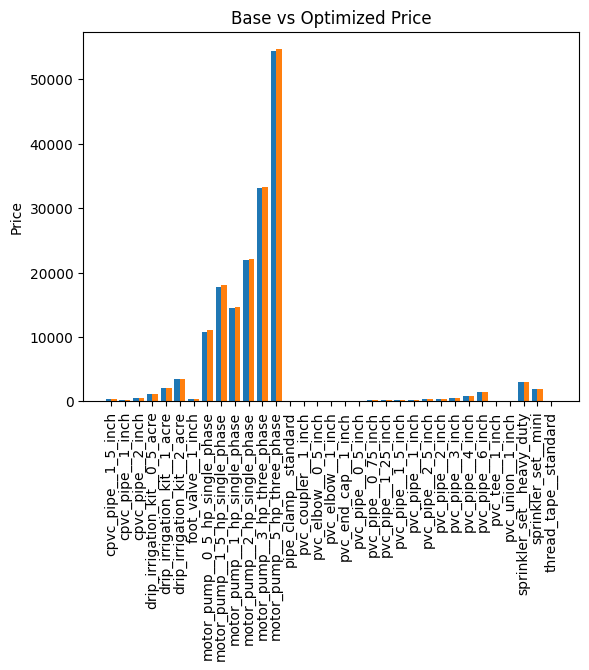

In [13]:
x = np.arange(len(final_output))

plt.figure()
plt.bar(x - 0.2, final_output['base_price'], width=0.4)
plt.bar(x + 0.2, final_output['optimized_price'], width=0.4)
plt.xticks(x, final_output['product_id'], rotation=90)
plt.ylabel("Price")
plt.title("Base vs Optimized Price")
plt.savefig("../reports/Optimization/images/optprice_vs_baseprice.png")
plt.show()


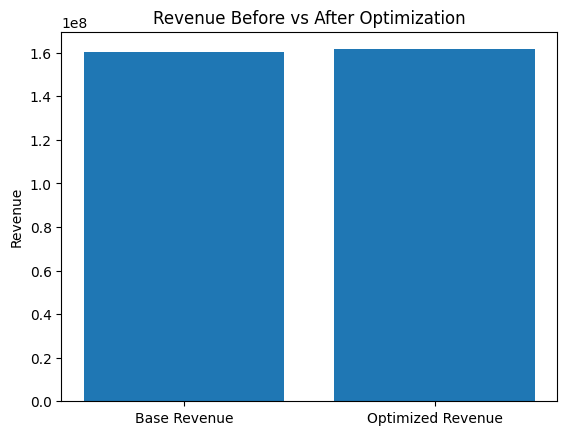

In [12]:
total_base_revenue = final_output['base_revenue'].sum()
total_opt_revenue = final_output['optimized_revenue'].sum()

plt.figure()
plt.bar(["Base Revenue", "Optimized Revenue"],
        [total_base_revenue, total_opt_revenue])
plt.ylabel("Revenue")
plt.title("Revenue Before vs After Optimization")
plt.show()
